<a href="https://colab.research.google.com/github/altn714/ESAA/blob/main/14%EC%A3%BC%EC%B0%A82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 차원 축소
* PCA (주성분 분석)

In [ ]:
#iris 4개의 속성을 2개의 PCA차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

#넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns=['sepal_length','sepal_width','petal_length','petal_width']
irisDF=pd.DataFrame(iris.data,columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


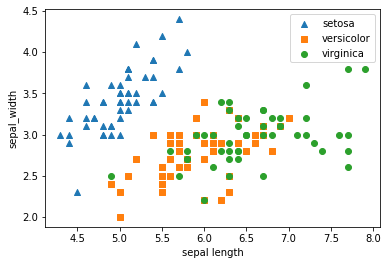

In [ ]:
#2차원으로 시각화
#setosa는 세모, versicolor은 네모, virginica는 동그라미로 표현
markers=['^','s','o']

#setosa의 target값은 0, versicolor은 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data=irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal_width')
plt.show()
#setos는 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포
#versi랑 virgin는 비슷하게 분포돼있어 분류가 어려움

In [ ]:
#개별 속성 함께 스케일링
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 모든 속성 값을 StandardScaler을 통해 표준 정규 분포를 가지는 값들로 변환
iris_scaled=StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [ ]:
#스케일링 적용된 데이터 세트에 PCA 적용해 붓꽃 데이터를 2차원 PCA 데이터로 변환
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
#PCA변환된 데이터의 칼럼 명을 각각 pca_component_1,pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca=pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


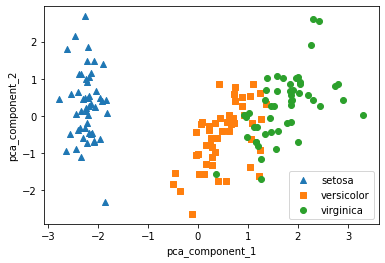

In [ ]:
#PCA 변환된 데이터 세트 2차원 상에서 시각화
#setosa는 세모 versicolor는 네모 virginica는 동그라미로 표시
markers=['^','s','o']

#pca_component_1을 x축,pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data=irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [ ]:
#PCA component별로 원본 데이터의 변동성 얼마나 반영하고 있는지
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
#원본 붓꽃 데이터에 랜덤 포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf=RandomForestClassifier(random_state=156)
scores=cross_val_score(rcf,iris.data,iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
#기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X=irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca=cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))
#원본 데이터 세트 대비 예측 정확도 PCA 변환 차원 개수 따라 예측 성능 떨어짐

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


In [ ]:
#좀 더 많은 피처 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교
#header 로 의미없는 첫 행 제거,  iloc로 기존 id제거
import pandas as pd

df=pd.read_excel('/content/drive/MyDrive/readcsv/clients.xls',header=1,sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

ImportError: ignored

In [ ]:
#target 속성인 default 칼럼 y_target 변수로 별도 저장 후 피처 데이터는 default 제외 별도의 DF 생성
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},inplace=True)
y_target=df['default']
X_features=df.drop('default',axis=1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr=X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,fmt='.1g')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1~BILL_AMT6까지의 6개의 속성명 생성
cols_bill['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

#2개의 PCA 속성을 가진 PCA 객체를 생성하고,explained_variance_ratio_계산을 위해fit() 호출
scaler=StandardScaler()
df_cols_scaled=scaler.fit(X_features[cols_bill])
pca=PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)

In [ ]:
#원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf=RandomForestClassifier(n_estimators=300,random_state=156)
scores=cross_val_score(rcf,X_features,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우의 개별 Fold세트 별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores))

In [ ]:
#6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하게 분류 예측 적용
from sklearn.decomposition import PCA
from sklearn.preprocessiog import StandardScaler

#원본 데이터 세트에 먼저 StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler

#6개의 컴포넌트를 가진 PCA변환을 수행하고 cross_val_score()로 분류 예측 수행
pca=PCA(n_components=6)
df_pca=pca.fit_transform(df_scaled)
scores_pca=cross_val_score(rcf,df_pca,y_target,scoring='accuracy',cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

* LDA (선형 판별 분석법)

In [ ]:
#붓꽃 데이터 세트를 사이킷런의 LDA 이용해 변환하고 그결과를 품종별로 시각화
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris=load_iris()
iris_scaled=StandardScaler().fit_transform(iris.data)

In [ ]:
#2개의 컴포넌트로 붓꽃 데이터를 LDA변환
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

In [ ]:
#LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda=pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모,versicolor은 네모, virginica는 동그라미
markers=['^','s','o']

#setosa의 target값은 0, versicolor은 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data=irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()